link = "https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry/data"

# Mental Health in IT

In [1]:
# import necessary modules
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
# Connect to the database
conn = sqlite3.connect('mental_health.sqlite')

In [3]:
# Query the database
q = "SELECT * FROM Question"

# Load the data into a pandas DataFrame
df_question = pd.read_sql_query(q, conn)

In [4]:
# print the first 5 rows
df_question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [5]:
# print the info
df_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   questionid    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [6]:
# Query the database
a = "SELECT * FROM Answer"

# Load the data into a pandas DataFrame
df_answer = pd.read_sql_query(a, conn)

# print the first 5 rows
df_answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [7]:
# print the info
df_answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [8]:
# Query the database
s = "SELECT * FROM Survey"

# Load the data into a pandas DataFrame
df_survey = pd.read_sql_query(s, conn)

# print the first 5 rows
df_survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [9]:
# print the info
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [10]:
# select the rows where UserID is 3 
print(df_answer.loc[df_answer['UserID'] == 3])

               AnswerText  SurveyID  UserID  QuestionID
2                      32      2014       3           1
1262                 Male      2014       3           2
2522               Canada      2014       3           3
3782                   -1      2014       3           4
5042                   -1      2014       3           5
6302                   No      2014       3           6
7562                    0      2014       3           7
8822                 6-25      2014       3           8
10082                   1      2014       3           9
11342                  No      2014       3          10
12602          Don't know      2014       3          11
13862                 Yes      2014       3          12
15122                  No      2014       3          90
16382                  No      2014       3          91
17642              Rarely      2014       3          92
18902                  No      2014       3          93
20162                  No      2014       3     

In [11]:
# print unique value to see how many questions are there
print(df_question['questionid'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]


In [12]:
# Get unique questions with their QuestionIDs
unique_questions = df_question[['questionid', 'questiontext']].drop_duplicates()

# Print the first 30 unique questions along with their QuestionIDs
for index, row in unique_questions.iterrows():
    if index < 25:  # Limit to the first 30
        print(f" {row['questionid']}, {row['questiontext']}")


 1, What is your age?
 2, What is your gender?
 3, What country do you live in?
 4, If you live in the United States, which state or territory do you live in?
 5, Are you self-employed?
 6, Do you have a family history of mental illness?
 7, Have you ever sought treatment for a mental health disorder from a mental health professional?
 8, How many employees does your company or organization have?
 9, Is your employer primarily a tech company/organization?
 10, Does your employer provide mental health benefits as part of healthcare coverage?
 11, Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
 12, Would you bring up a mental health issue with a potential employer in an interview?
 13, Is your primary role within your company related to tech/IT?
 14, Do you know the options for mental health care available under your employer-provided health coverage?
 15, Has your employer ever formally discu

In [13]:
# Print questions from index 25 to 50
for index, row in unique_questions.iterrows():
    if 25 <= index < 50:  # Start from index 25 up to but not including 50
        print(f" {row['questionid']}, {row['questiontext']}")


 26, Did your previous employers provide resources to learn more about mental health disorders and how to seek help?
 27, Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
 28, Would you have been willing to discuss your mental health with your direct supervisor(s)?
 29, Would you be willing to bring up a physical health issue with a potential employer in an interview?
 30, How willing would you be to share with friends and family that you have a mental illness?
 31, Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
 32, Have you had a mental health disorder in the past?
 33, Do you currently have a mental health disorder?
 34, Have you ever been diagnosed with a mental health disorder?
 48, If you have a mental health disorder, how often do you feel that it interferes wi

In [14]:
# Print questions from index 50 to 75
for index, row in unique_questions.iterrows():
    if 50 <= index < 75:  
        print(f" {row['questionid']}, {row['questiontext']}")

 64, Overall, how much importance does your employer place on physical health?
 65, Overall, how much importance does your employer place on mental health?
 66, If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?
 67, If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?
 68, Was your employer primarily a tech company/organization?
 69, Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
 70, Did you ever discuss your mental health with your previous employer?
 71, Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.
 72, Did you ever discuss your mental health with a previous coworker(s)?
 73, Describe the conversation you had with your previous coworkers 

In [15]:
# Print questions from index 75to 100
for index, row in unique_questions.iterrows():
    if 75 <= index < 100:  
        print(f" {row['questionid']}, {row['questiontext']}")

 89, What is your race?
 90, Do you think that discussing a physical health issue with your employer would have negative consequences?
 91, Do you feel that your employer takes mental health as seriously as physical health?
 92, If you have a mental health condition, do you feel that it interferes with your work?
 93, Do you work remotely (outside of an office) at least 50% of the time?
 94, Do you know the options for mental health care your employer provides?
 95, Has your employer ever discussed mental health as part of an employee wellness program?
 96, Does your employer provide resources to learn more about mental health issues and how to seek help?
 97, How easy is it for you to take medical leave for a mental health condition?
 98, Do you think that discussing a mental health issue with your employer would have negative consequences?
 99, Would you be willing to discuss a mental health issue with your coworkers?
 100, Would you be willing to discuss a mental health issue with y

In [16]:
# Print questions from index 100 to 120
for index, row in unique_questions.iterrows():
    if 100 <= index < 120: 
        print(f" {row['questionid']}, {row['questiontext']}")

 114, Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
 115, If yes, what condition(s) have you been diagnosed with?
 116, If maybe, what condition(s) do you believe you have?
 117, Which of the following best describes your work position?
 118, Do you work remotely?


In [17]:
# get unique number of users
print(df_answer['UserID'].nunique())

4218


## Employees in IT

In [18]:
def print_answer_counts(df, question_id):
    """
    Prints the value counts of AnswerText for a specific QuestionID in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing survey responses.
    question_id (int): The QuestionID to filter by.

    Returns:
    None
    """
    # Filter the DataFrame for the specific QuestionID and get value counts of AnswerText
    answer_counts = df[df['QuestionID'] == question_id]['AnswerText'].value_counts()
    
    # Print the result
    print(f"Value counts for QuestionID {question_id}:")
    print(answer_counts)




**Note** : I realised that there was -1 in the dataset after further investigation I realised it's inconclusive data that cannot be necessarily be identified

In [19]:
# Print the value counts for QuestionID 13 
print_answer_counts(df_answer, 13) # Those with a primary role in IT

Value counts for QuestionID 13:
AnswerText
1     1471
-1    1387
0      100
Name: count, dtype: int64


In [20]:
# Print the value counts for QuestionID 5
print_answer_counts(df_answer, 5) # Those who are self employed

Value counts for QuestionID 5:
AnswerText
0     3550
1      650
-1      18
Name: count, dtype: int64


In [21]:
# Filter for QuestionID 1 and where AnswerText is 15
age_employed = df_answer[(df_answer['QuestionID'] == 1) & (df_answer['AnswerText'] == '15')]

# Display the result
print(age_employed) # To confirm if -1 represnts False or 0 represents False

# This is assuming 1 is True

      AnswerText  SurveyID  UserID  QuestionID
33568         15      2016    2069           1


In [22]:
# Through the user_id I'll tried to figure out whether 0 is true or false
age_id = df_answer[(df_answer['QuestionID'] == 5) & (df_answer['UserID'] == 2069)]

# Display the result
print(age_id)

#Apparently the 15 y/o was employed

      AnswerText  SurveyID  UserID  QuestionID
39300          1      2016    2069           5


In [23]:
# Filter for QuestionID 1 and where AnswerText is -1
employed_negative = df_answer[(df_answer['QuestionID'] == 5) & (df_answer['AnswerText'] == '-1')]

# Display the result
print(employed_negative) # I noticed that all user_ids, surveys_ids had a negative 1 

     AnswerText  SurveyID  UserID  QuestionID
5040         -1      2014       1           5
5041         -1      2014       2           5
5042         -1      2014       3           5
5043         -1      2014       4           5
5044         -1      2014       5           5
5045         -1      2014       6           5
5046         -1      2014       7           5
5047         -1      2014       8           5
5048         -1      2014       9           5
5049         -1      2014      10           5
5050         -1      2014      11           5
5051         -1      2014      12           5
5052         -1      2014      13           5
5053         -1      2014      14           5
5054         -1      2014      15           5
5055         -1      2014      16           5
5056         -1      2014      17           5
5057         -1      2014      18           5


My conclusion is the questions were considered in the first survey since it was the beginning and was later adjusted

**Conclusion* : The -1 presents unanswered questions

In [24]:
# confirm the assumption
print_answer_counts(df_answer, 9)

Value counts for QuestionID 9:
AnswerText
1     2888
0      826
-1     504
Name: count, dtype: int64


In [25]:
# Filter for QuestionID 9 & 5 and where AnswerText is -1
employed_negative = df_answer[(df_answer['QuestionID'].isin([9 & 5])) & (df_answer['AnswerText'] == '-1')]

# Display the result
print(employed_negative)

# If they neither have an employer or self employed, their answer will be inconclusive


       AnswerText  SurveyID  UserID  QuestionID
390            -1      2014     391           1
715            -1      2014     716           1
1127           -1      2014    1128           1
115194         -1      2017    3447           1
115196         -1      2017    3449           1


This clearly proves that -1 is an inconclusive answer since. Since majority of the -1 in self employed, have not claimed to be self employed in question 9

In [26]:
# Filtering the data to employees primarilly working in IT
it_one = (df_answer['QuestionID'] == 13) & (df_answer['AnswerText'] == '1')

# assign a variable to the dataFrame
in_it = df_answer[it_one]

# acquire the unique values that are user ids for identififcation
ids_in_it = in_it['UserID'].unique()

# create dataFrame by a condition that the UserID determines those in IT
employee_it = df_answer[df_answer['UserID'].isin(ids_in_it)]
employee_it.head()


,AnswerText,SurveyID,UserID,QuestionID
32764,43,2016,1265,1
32768,44,2016,1269,1
32771,34,2016,1272,1
32773,44,2016,1274,1
32779,31,2016,1280,1


In [27]:
# get employee information
employee_it.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108226 entries, 32764 to 236896
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  108226 non-null  object
 1   SurveyID    108226 non-null  int64 
 2   UserID      108226 non-null  int64 
 3   QuestionID  108226 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.1+ MB


In [28]:
# Check on how many assume or have a mental disorder
print_answer_counts(employee_it, 33)

Value counts for QuestionID 33:
AnswerText
Yes           625
No            445
Possibly      247
Don't Know     98
Maybe          56
Name: count, dtype: int64


In [29]:
# aquire the employees that are not in IT through the same process
it_zero = (df_answer['QuestionID'] == 13) & (df_answer['AnswerText'] == '0')
not_it = df_answer[it_zero]
ids_not_it = not_it['UserID'].unique()
employee_nonit = df_answer[df_answer['UserID'].isin(ids_not_it)]
employee_nonit.head()

,AnswerText,SurveyID,UserID,QuestionID
32815,31,2016,1316,1
32826,35,2016,1327,1
32870,31,2016,1371,1
32923,55,2016,1424,1
33247,51,2016,1748,1


In [30]:
# Check on how many assume or have a mental disorder
print_answer_counts(employee_nonit, 33)

Value counts for QuestionID 33:
AnswerText
Yes           51
No            28
Possibly      15
Maybe          3
Don't Know     3
Name: count, dtype: int64


In [31]:
# Filter to find the inconclusive results
it_minus_one = (df_answer['QuestionID'] == 13) & (df_answer['AnswerText'] == '-1')
minus_it = df_answer[it_minus_one]
ids_minus_it = minus_it['UserID'].unique()
employee_minus_it = df_answer[df_answer['UserID'].isin(ids_minus_it)]
employee_minus_it.head()

,AnswerText,SurveyID,UserID,QuestionID
32760,39,2016,1261,1
32761,29,2016,1262,1
32762,38,2016,1263,1
32763,43,2016,1264,1
32765,42,2016,1266,1


In [32]:
# Check on how many assume or have a mental disorder
print_answer_counts(employee_minus_it, 33)

Value counts for QuestionID 33:
AnswerText
Yes           561
No            496
Maybe         268
Possibly       39
Don't Know     23
Name: count, dtype: int64


Based on the results by estimating that the inconclusive results are closer in figures in comparison to the non-it we can assume majority of them might in IT. 

There's also a possibility that the values were not filled because the surveyor was aware they were in IT

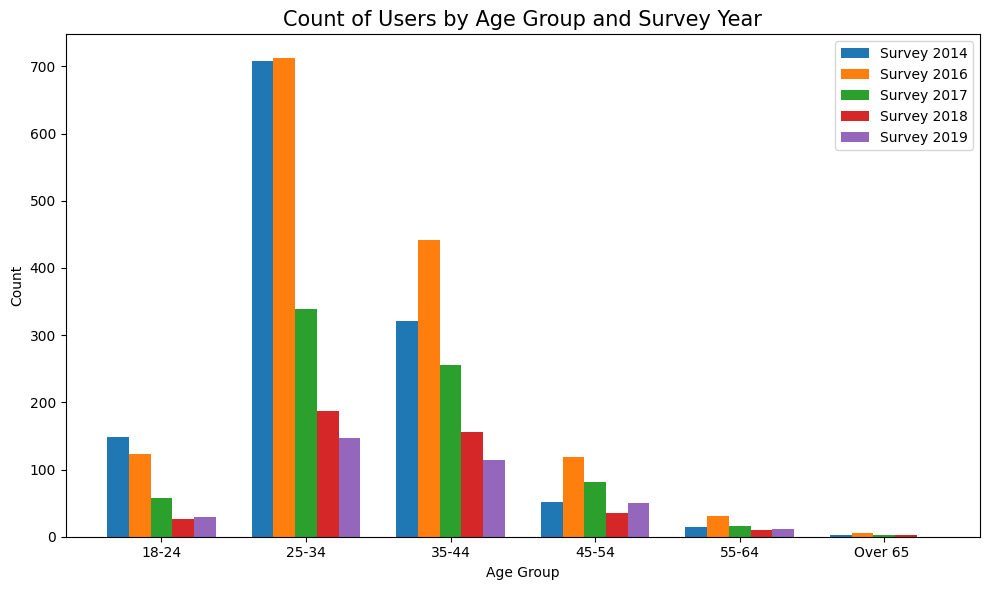

In [33]:
# Creating a query to find the distribution of age groups in each survey
query = """

SELECT SurveyID, 
       CASE 
            WHEN AnswerText BETWEEN 18 AND 24 THEN '18-24' 
            WHEN AnswerText BETWEEN 25 AND 34 THEN '25-34'
            WHEN AnswerText BETWEEN 35 AND 44 THEN '35-44'
            WHEN AnswerText BETWEEN 45 AND 54 THEN '45-54'
            WHEN AnswerText BETWEEN 55 AND 64 THEN '55-64'
            WHEN AnswerText BETWEEN 65 AND 99 THEN 'Over 65 '
        END AS age_group,  
    COUNT(*) AS count
FROM Answer
WHERE SurveyID IN (2014, 2016, 2017, 2018, 2019)
      AND QuestionID=1
      AND AnswerText > 18
      
GROUP BY SurveyID, age_group
ORDER BY SurveyID, age_group; 
"""
# Assuming the query has already run and Age_Survey contains the data
Age_Survey = pd.read_sql(query, conn)

# Get unique age groups and survey IDs
age_groups = Age_Survey['age_group'].unique()
survey_ids = Age_Survey['SurveyID'].unique()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
x = np.arange(len(age_groups))

# Loop through each survey ID and plot bars side by side
for i, survey_id in enumerate(survey_ids):
    survey_data = Age_Survey[Age_Survey['SurveyID'] == survey_id]
    counts = [survey_data[survey_data['age_group'] == age_group]['count'].values[0] if age_group in survey_data['age_group'].values else 0 for age_group in age_groups]
    
    ax.bar(x + i * bar_width, counts, bar_width, label=f"Survey {survey_id}")

# Set x and y axis labels
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Set x-axis tick positions and labels
ax.set_xticks(x + bar_width * (len(survey_ids) - 1) / 2)
ax.set_xticklabels(age_groups)

# Set the title of the plot
ax.set_title('Count of Users by Age Group and Survey Year', fontsize=15)

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Employees in IT Visualization

In [34]:
# Define the new function to return the answer counts
def get_answer_counts(df, question_id):
    # Assuming this function calculates the counts for a specific question
    result = df[df['QuestionID'] == question_id]['AnswerText'].value_counts()
    return result

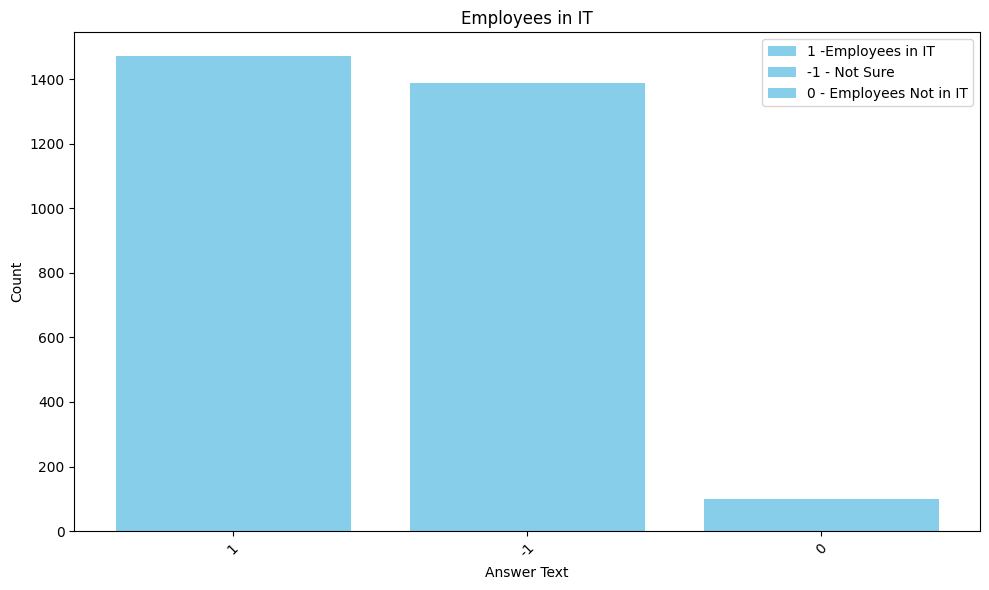

In [35]:
# plot the bar chart
plt.figure(figsize=(10, 6))
it_employees_counts = get_answer_counts(df_answer, 13)

bars = plt.bar(it_employees_counts.index, it_employees_counts.values, color='skyblue')

legend_mapping = {
    '1': '1 -Employees in IT',
    '-1': '-1 - Not Sure',
    '0': '0 - Employees Not in IT'
}

# Add titles and labels
plt.title('Employees in IT')
plt.xlabel('Answer Text')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
# Create a legend
plt.legend(bars, [legend_mapping[str(i)] for i in it_employees_counts.index])


plt.show()

Based on the data the surveyors main focus was finding the employees in IT

This defends the Hypotheses that the Surveyous -1 was employees in IT

In [36]:
# Assuming print_answer_counts is defined and returns a Series or DataFrame
gender_it = print_answer_counts(employee_it, 2)

# Print the output for debugging
print("Result of print_answer_counts:\n", gender_it)

Value counts for QuestionID 2:
AnswerText
Male                            821
Female                          320
male                            178
female                           81
-1                               12
Nonbinary                         5
None                              3
Non-binary                        3
agender                           2
Trans man                         2
Non binary                        2
Genderqueer                       2
Agender                           2
Cishet male                       1
non-binary                        1
Demiguy                           1
none                              1
masculino                         1
femmina                           1
Agender trans woman               1
Trans female                      1
She/her/they/them                 1
Questioning                       1
Other                             1
SWM                               1
NB                                1
Nonbinary/femme       

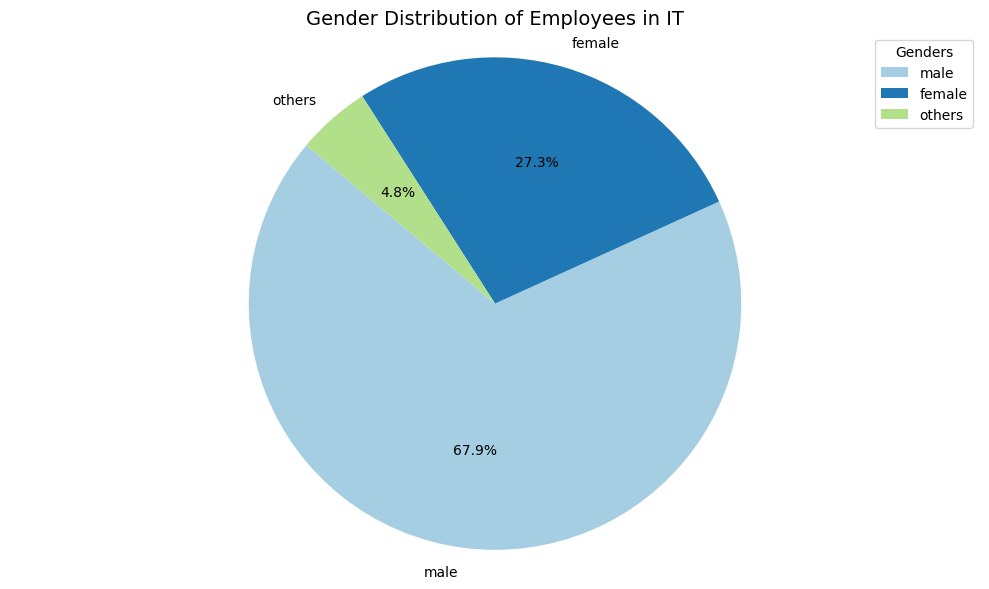

In [37]:
# Data from value counts for QuestionID 2
data = {
    'Male': 821 +178,
    'Female': 320 + 81,
    '-1': 12,
    'Nonbinary': 5,
    'Non-binary': 3,
    'None': 3,
    'Agender': 2,
    'agender': 2,
    'Trans man': 2,
    'Non binary': 2,
    'Genderqueer': 2,
    'Male-ish': 1,
    'Female/gender non-binary.': 1,
    'SWM': 1,
    'genderfluid': 1,
    'none': 1,
    'Other': 1,
    'Masculine': 1,
    'Genderqueer demigirl': 1,
    'Transfeminine': 1,
    'Trans non-binary/genderfluid': 1,
    'uhhhhhhhhh fem genderqueer?': 1,
    'Questioning': 1,
    'non binary': 1,
    'NB': 1,
    'Cishet male': 1,
    'Genderfluid': 1,
    'Agender trans woman': 1,
    'Queer': 1,
    'Demiguy': 1,
    'She/her/they/them': 1,
    'gender non-conforming woman': 1,
    'nonbinary': 1,
    'God King of the Valajar': 1,
    'genderqueer woman': 1,
    'Genderqueer/non-binary': 1,
    'sometimes': 1,
    'Male (trans, FtM)': 1,
    '\\-': 1,
    'Ostensibly Male': 1,
    'transgender': 1,
    'non-binary': 1,
    'Agender/genderfluid': 1,
    'Nonbinary/femme': 1,
    'femmina': 1,
    'Contextual': 1,
    'masculino': 1,
    'Trans female': 1,
    'Trans woman': 1
}

# Create a Pandas Series from the dictionary
gender_it = pd.Series(data)

# Standardize text by converting all keys to lowercase
gender_it.index = gender_it.index.str.lower()

# Categorize values less than 50 as "Others" and sum those values into a single "Others" group
others_count = gender_it[gender_it < 50].sum()  # Sum all values less than 50
gender_it = gender_it[gender_it >= 50]  # Keep values greater than or equal to 50
gender_it['others'] = others_count  # Add the "Others" category with the summed count

# Plot the pie chart
plt.figure(figsize=(10, 6), facecolor='white')  # Set white background
patches, texts, autotexts = plt.pie(
    gender_it, labels=gender_it.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors
)

# Set font size for labels and percentages
for text in texts + autotexts:
    text.set_fontsize(10)

# Add a title
plt.title('Gender Distribution of Employees in IT', fontsize=14)

# Add a legend
plt.legend(patches, gender_it.index, title="Genders", loc="best")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()  # Adjust layout
plt.show()


In [38]:
# Assuming print_answer_counts is defined and returns a Series or DataFrame
gender_not_it = print_answer_counts(employee_nonit, 2)

# Print the output for debugging
print("Result of print_answer_counts:\n", gender_not_it)



Value counts for QuestionID 2:
AnswerText
Female                         45
Male                           31
female                         14
male                            5
-1                              2
Nonbinary                       1
43                              1
Non-binary and gender fluid     1
Name: count, dtype: int64
Result of print_answer_counts:
 None


In [39]:
# get the values for Races in IT
print_answer_counts(employee_it, 89)

Value counts for QuestionID 89:
AnswerText
White                               741
-1                                  388
More than one of the above           30
Asian                                25
I prefer not to answer               25
Black or African American            10
American Indian or Alaska Native      1
Hispanic                              1
White Hispanic                        1
Caucasian                             1
Name: count, dtype: int64


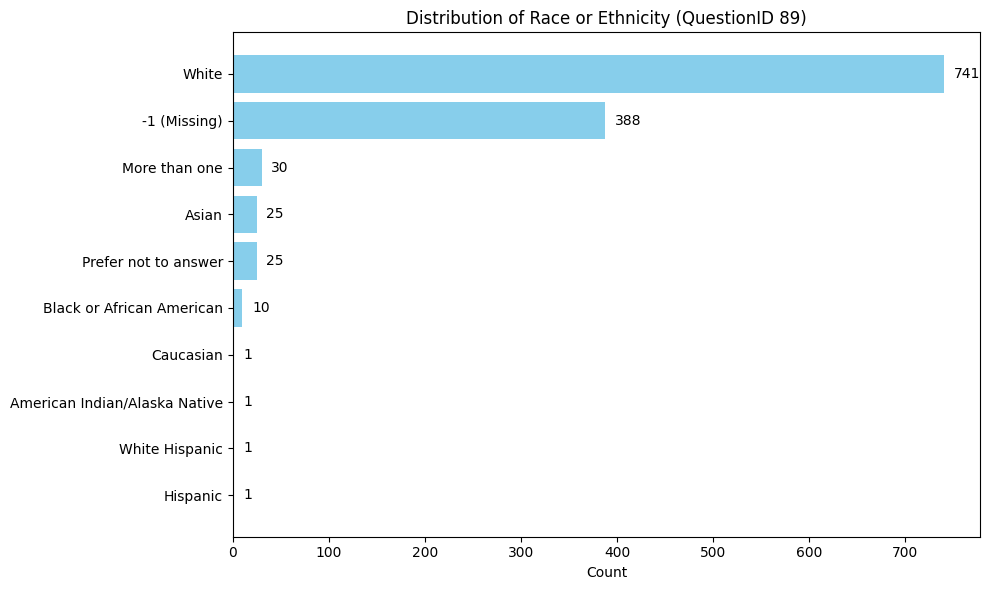

In [40]:
# Define the categories and their corresponding counts
categories = ['White', '-1 (Missing)', 'More than one', 'Asian', 'Prefer not to answer', 
              'Black or African American', 'Caucasian', 'American Indian/Alaska Native', 
              'White Hispanic', 'Hispanic']

counts = [741, 388, 30, 25, 25, 10, 1, 1, 1, 1]

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.barh(categories, counts, color='skyblue')

# Add labels and title
ax.set_xlabel('Count')
ax.set_title('Distribution of Race or Ethnicity (QuestionID 89)')

# Add data labels on the bars
for i, count in enumerate(counts):
    ax.text(count + 10, i, str(count), va='center')

# Invert the y-axis to have the highest count on top
ax.invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


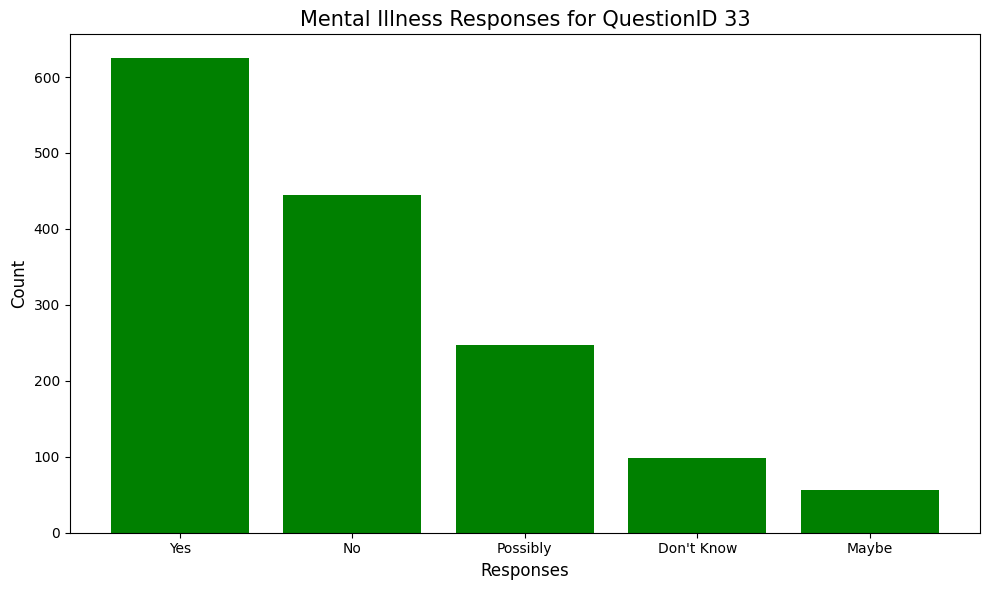

In [41]:
# Plotting the counts for the question of whether they think or have a mental disorder
plt.figure(figsize=(10, 6))
mental_illness_it = get_answer_counts(employee_it, 33)
bars = plt.bar(mental_illness_it.index, mental_illness_it.values, color='green')

# Adding labels and title
plt.xlabel('Responses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Mental Illness Responses for QuestionID 33', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

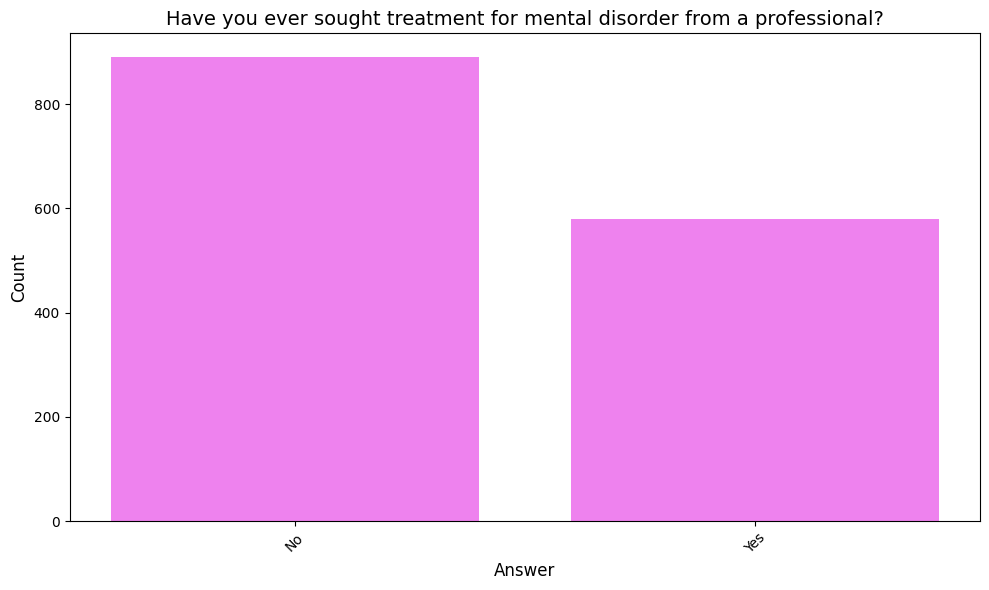

In [42]:
# Call the function to get the answer counts
plot_it = get_answer_counts(employee_it, 7)

# Ensure gender_it is not None before plotting
if plot_it is not None:
    # Plot the bar chart with custom colors
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    bars = plt.bar(plot_it.index, plot_it.values, color='violet')

    # Add titles and labels
    plt.title('Have you ever sought treatment for mental disorder from a professional?', fontsize=14)
    plt.xlabel('Answer', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Change x-axis labels from 0/1 to 'No'/'Yes'
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("Error: The function returned None.")

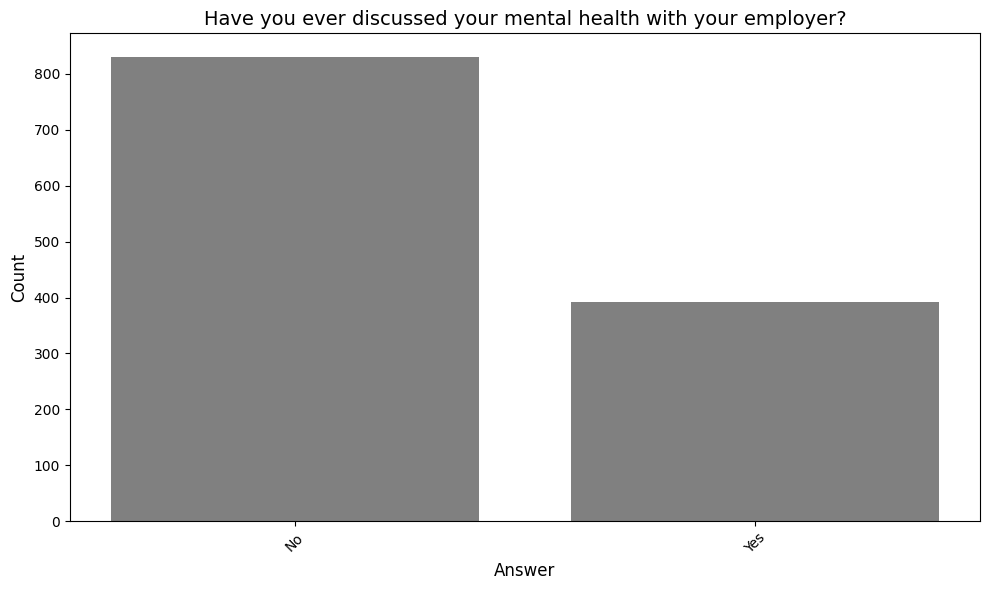

In [43]:
# Call the function to get the answer counts
plot_it = get_answer_counts(employee_it, 58)

# Ensure gender_it is not None before plotting
if plot_it is not None:
    # Plot the bar chart with custom colors
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    bars = plt.bar(plot_it.index, plot_it.values, color='grey')

    # Add titles and labels
    plt.title('Have you ever discussed your mental health with your employer?', fontsize=14)
    plt.xlabel('Answer', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Change x-axis labels from 0/1 to 'No'/'Yes'
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("Error: The function returned None.")

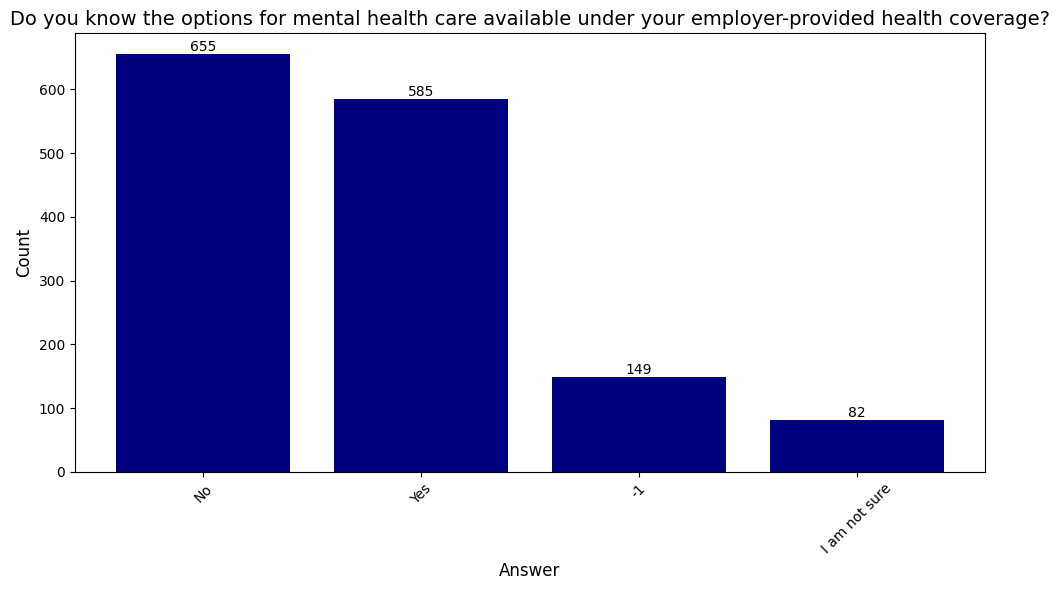

In [44]:
# Call the function to get the answer counts
plot_it = get_answer_counts(employee_it, 14)

# Ensure plot_it is not None before plotting
if plot_it is not None:
    # Plot the bar chart with custom colors
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    bars = plt.bar(plot_it.index, plot_it.values, color='navy')

    # Add titles and labels
    plt.title('Do you know the options for mental health care available under your employer-provided health coverage?', fontsize=14)
    plt.xlabel('Answer', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Annotate bars with the count values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
                 ha='center', va='bottom')  # Adding value labels on top of bars

    # Set the x-ticks to original answer text (make sure `plot_it.index` contains original values)
    plt.xticks(ticks=range(len(plot_it.index)), labels=plot_it.index, rotation=45)  # Rotate for better readability

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("Error: The function returned None.")


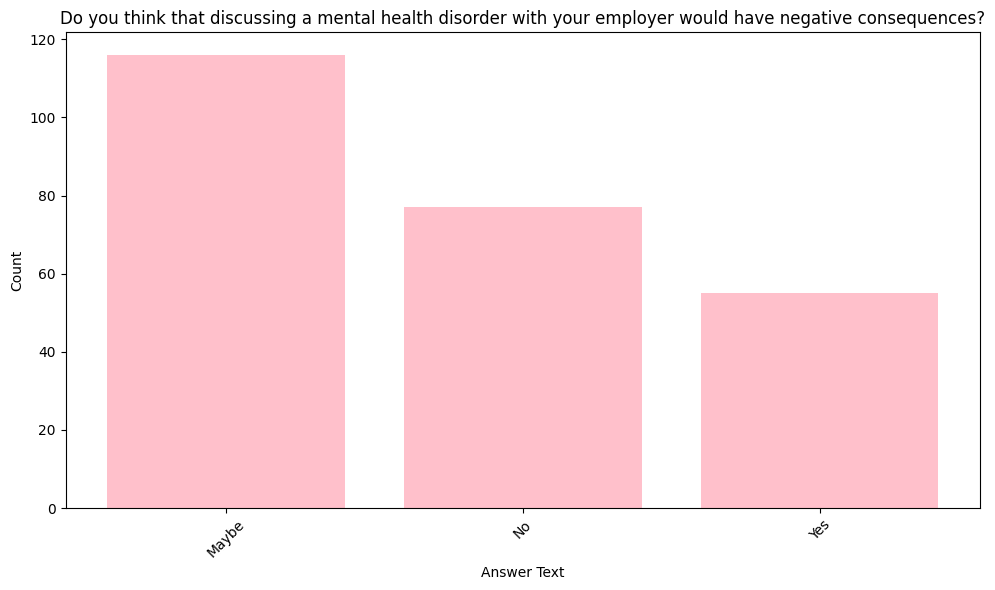

In [45]:
plt.figure(figsize=(10, 6))
plot_it = get_answer_counts(employee_it, 104)

bars = plt.bar(plot_it.index, plot_it.values, color='pink')


# Add titles and labels
plt.title('Do you think that discussing a mental health disorder with your employer would have negative consequences?')
plt.xlabel('Answer Text')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
# Create a legend

plt.show()

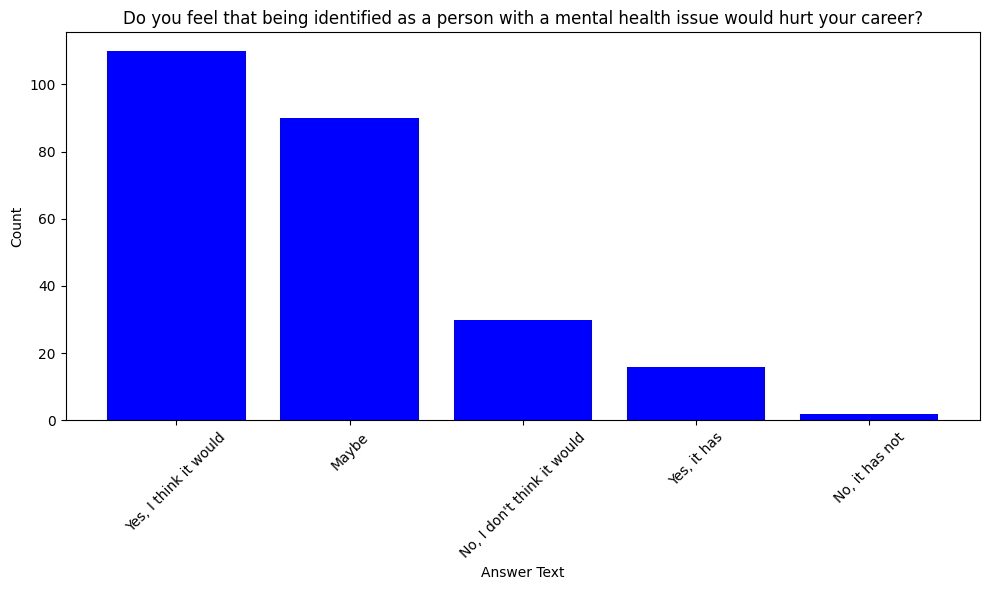

In [46]:
plt.figure(figsize=(10, 6))
gender_it = get_answer_counts(employee_it, 113)

bars = plt.bar(gender_it.index, gender_it.values, color='blue')


# Add titles and labels
plt.title('Do you feel that being identified as a person with a mental health issue would hurt your career?')
plt.xlabel('Answer Text')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
# Create a legend

plt.show()

In [47]:
# Filter 'Yes' and 'No' answers for both questions
df_family_illness = df_answer[df_answer['QuestionID'] == 6][['UserID', 'AnswerText']]
df_individual_illness = df_answer[df_answer['QuestionID'] == 33][['UserID', 'AnswerText']]

# Merge the two DataFrames on EmployeeID
merged_df = pd.merge(df_family_illness, df_individual_illness, on='UserID', suffixes=('_family', '_individual'))

# Convert 'Yes' and 'No' to 1 and 0 for both columns
merged_df['AnswerText_family'] = merged_df['AnswerText_family'].map({'Yes': 1, 'No': 0})
merged_df['AnswerText_individual'] = merged_df['AnswerText_individual'].map({'Yes': 1, 'No': 0})

# Calculate the correlation between the two columns
correlation = merged_df['AnswerText_family'].corr(merged_df['AnswerText_individual'])

# Print the correlation result
print(f'Correlation between Family History and Individual Mental Illness: {correlation*100:.2f}%')


Correlation between Family History and Individual Mental Illness: 50.05%


This means that people with a family history of mental illness tend to be more likely to have or assume they have an individual mental illness.

## Employer in IT

In [48]:
# Figuring out those who have employers in IT
print_answer_counts(df_answer, 9)

Value counts for QuestionID 9:
AnswerText
1     2888
0      826
-1     504
Name: count, dtype: int64


In [49]:
# Filtering to acquire those with employers in IT
employer_it_one = (df_answer['QuestionID'] == 9) & (df_answer['AnswerText'] == '1')
employer_it = df_answer[employer_it_one]
emps_in_it = employer_it['UserID'].unique()
employer_it = df_answer[df_answer['UserID'].isin(emps_in_it)]
employer_it.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
5,33,2014,6,1


In [50]:
# Filter to acquire those without employers in IT
employer_it_zero = (df_answer['QuestionID'] == 9) & (df_answer['AnswerText'] == '0')
employer_nonit = df_answer[employer_it_zero]
emps_non_it = employer_nonit['UserID'].unique()
employer_nonit = df_answer[df_answer['UserID'].isin(emps_non_it)]
employer_nonit.head()

,AnswerText,SurveyID,UserID,QuestionID
1,44,2014,2,1
12,42,2014,13,1
23,41,2014,24,1
25,35,2014,26,1
58,26,2014,59,1


In [51]:
# Filter for the inconclusive
employer_it_null = (df_answer['QuestionID'] == 9) & (df_answer['AnswerText'] == '-1')
employer_null_it = df_answer[employer_it_null]
emps_null_it = employer_null_it['UserID'].unique()
employer_null_it = df_answer[df_answer['UserID'].isin(emps_null_it)]
employer_null_it.head()

,AnswerText,SurveyID,UserID,QuestionID
32763,43,2016,1264,1
32769,30,2016,1270,1
32778,25,2016,1279,1
32784,38,2016,1285,1
32793,37,2016,1294,1


In [52]:
# Does your employer provide mental health benefits?
print_answer_counts(employer_it, 10)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 10)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 10)


Value counts for QuestionID 10:
AnswerText
Yes                               1326
No                                 623
I don't know                       496
Don't know                         335
Not eligible for coverage / NA     108
Name: count, dtype: int64

Value counts for QuestionID 10:
AnswerText
Yes                               418
I don't know                      162
No                                133
Don't know                         73
Not eligible for coverage / NA     40
Name: count, dtype: int64

Value counts for QuestionID 10:
AnswerText
-1    504
Name: count, dtype: int64


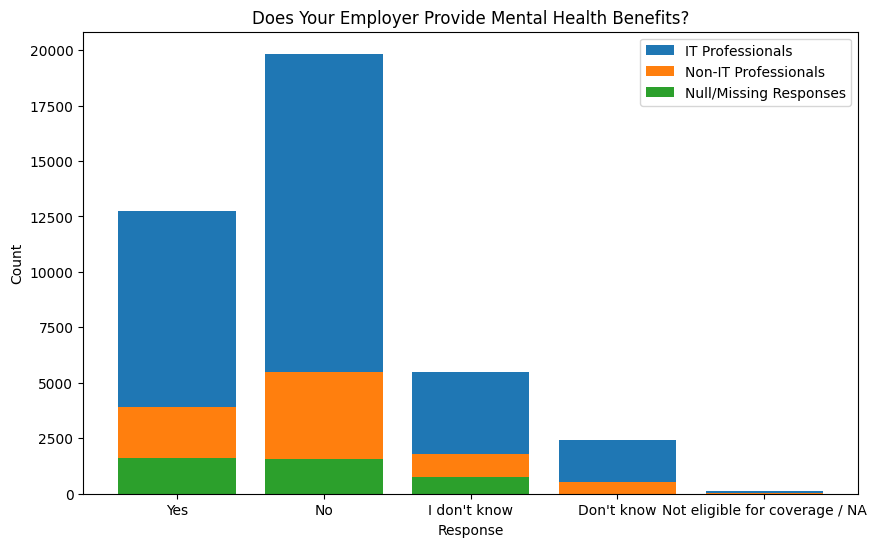

In [53]:
# Define the labels for the x-axis (consistent with the value counts from QuestionID 10)
labels = ['Yes', 'No', 'I don\'t know', 'Don\'t know', 'Not eligible for coverage / NA']

# Assume this function returns a list of counts for each of the categories
def answer_counts(data, n):
    # Count the number of occurrences for each category and pad with 0 if needed
    counts = data['AnswerText'].value_counts()
    # Return counts in the same order as the labels (including missing categories as 0)
    return [counts.get(label, 0) for label in labels]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for each dataset
ax.bar(labels, answer_counts(employer_it, 10), label='IT Professionals')
ax.bar(labels, answer_counts(employer_nonit, 10), label='Non-IT Professionals')
ax.bar(labels, answer_counts(employer_null_it, 10), label='Null/Missing Responses')

# Set the title and labels
ax.set_title('Does Your Employer Provide Mental Health Benefits?')
ax.set_xlabel('Response')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [54]:
# Would you bring up a mental health issue with a potential employer in an interview? 
print_answer_counts(employer_it, 12)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 12)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 12)


Value counts for QuestionID 12:
AnswerText
No       2042
Maybe     676
Yes       170
Name: count, dtype: int64

Value counts for QuestionID 12:
AnswerText
No       603
Maybe    193
Yes       30
Name: count, dtype: int64

Value counts for QuestionID 12:
AnswerText
No       306
Maybe    167
Yes       31
Name: count, dtype: int64


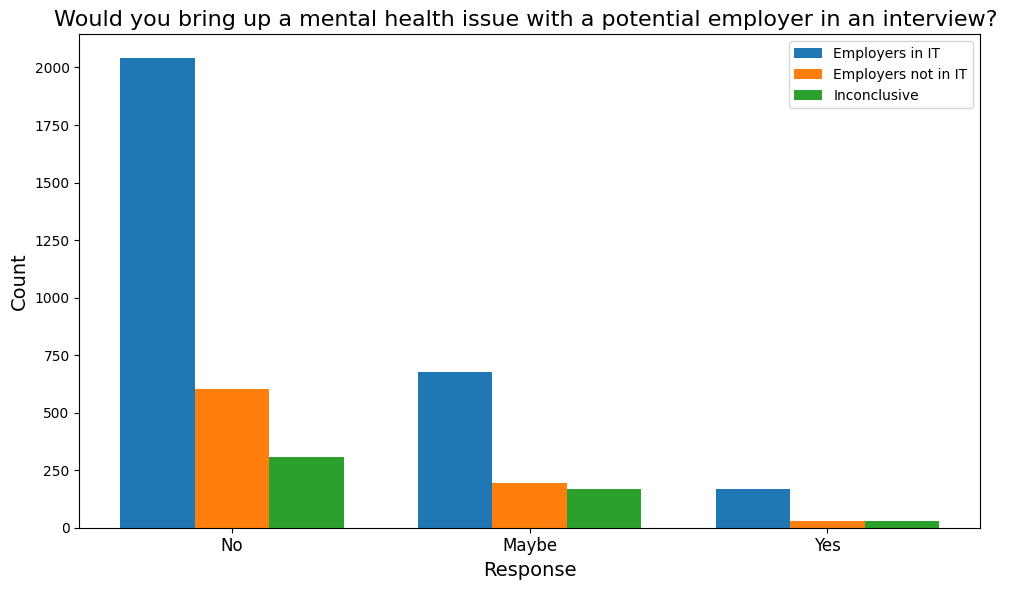

In [55]:
data_it = {
    'Response': ['No', 'Maybe', 'Yes'],
    'Count': [2042, 676, 170]
}

data_not_in_it = {
    'Response': ['No', 'Maybe', 'Yes'],
    'Count': [603, 193, 30]
}

data_inconclusive = {
    'Response': ['No', 'Maybe', 'Yes'],
    'Count': [306, 167, 31]
}

# Create DataFrames
df_it = pd.DataFrame(data_it)
df_not_in_it = pd.DataFrame(data_not_in_it)
df_inconclusive = pd.DataFrame(data_inconclusive)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25
index = range(len(df_it))

# Plotting the bars
bars1 = ax.bar(index, df_it['Count'], bar_width, label='Employers in IT')
bars2 = ax.bar([i + bar_width for i in index], df_not_in_it['Count'], bar_width, label='Employers not in IT')
bars3 = ax.bar([i + bar_width*2 for i in index], df_inconclusive['Count'], bar_width, label='Inconclusive')

# Adding labels and title
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Would you bring up a mental health issue with a potential employer in an interview? ', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(df_it['Response'], fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [56]:
print_answer_counts(employer_it, 58)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 58)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 58)

Value counts for QuestionID 58:
AnswerText
0    634
1    340
Name: count, dtype: int64

Value counts for QuestionID 58:
AnswerText
0    252
1     82
Name: count, dtype: int64

Value counts for QuestionID 58:
AnswerText
-1    217
Name: count, dtype: int64


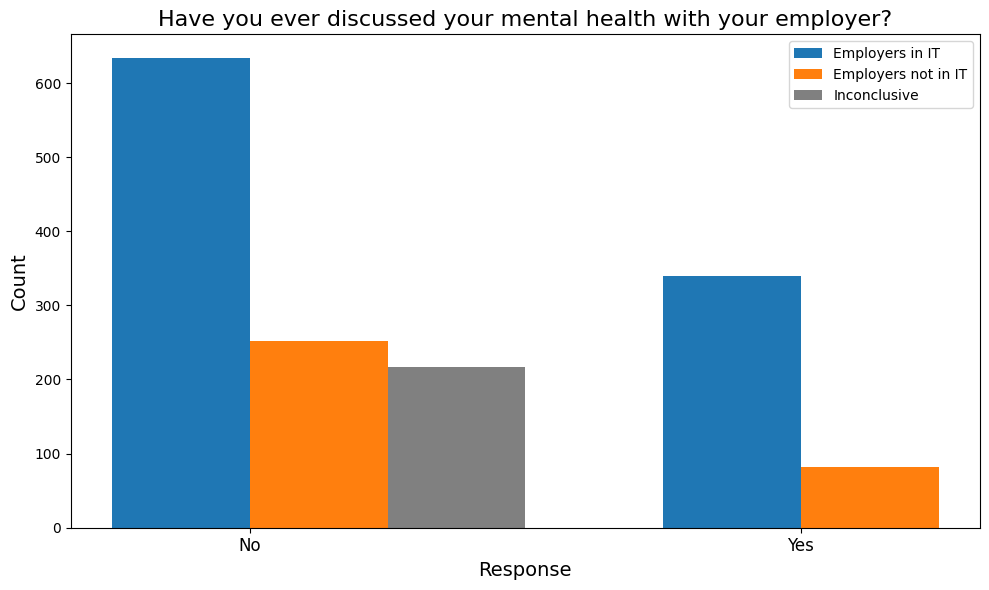

In [57]:
data_it = {
    'Response': ["No", "Yes"],
    'Count': [634, 340]
}

data_not_in_it = {
    'Response': ["No", "Yes"],
    'Count': [252, 82]
}

data_inconclusive = {
    'Response': ["-1"],  # Only one category for inconclusive responses
    'Count': [217]
}

# Create DataFrames
df_it = pd.DataFrame(data_it)
df_not_in_it = pd.DataFrame(data_not_in_it)
df_inconclusive = pd.DataFrame(data_inconclusive)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25
index = range(len(df_it))

# Plotting the bars for IT and not in IT
bars1 = ax.bar(index, df_it['Count'], bar_width, label='Employers in IT')
bars2 = ax.bar([i + bar_width for i in index], df_not_in_it['Count'], bar_width, label='Employers not in IT')

# Plotting the inconclusive responses
# We need to adjust for the single category in inconclusive
bars3 = ax.bar([i + bar_width*2 for i in index[:1]], df_inconclusive['Count'], bar_width, label='Inconclusive', color='gray')

# Adding labels and title
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Have you ever discussed your mental health with your employer?", fontsize=16)

# Adjust x-ticks for IT and not in IT responses
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_it['Response'], fontsize=12)

# Set legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
# Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
print_answer_counts(employer_it, 15)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 15)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 15)

Value counts for QuestionID 15:
AnswerText
No              1264
Yes              420
I don't know     173
Name: count, dtype: int64

Value counts for QuestionID 15:
AnswerText
No              362
Yes             179
I don't know     56
Name: count, dtype: int64

Value counts for QuestionID 15:
AnswerText
-1    504
Name: count, dtype: int64


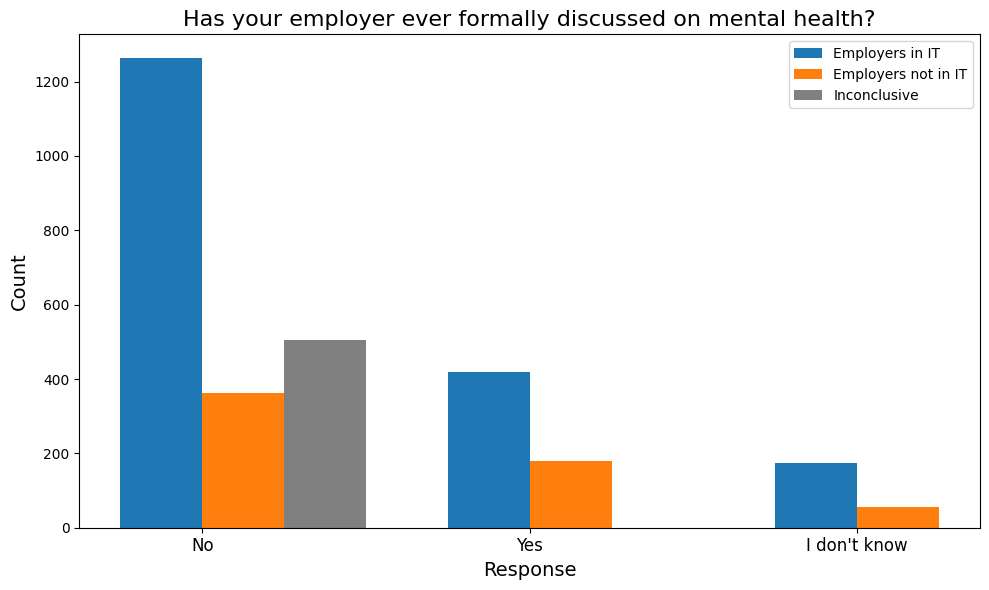

In [59]:
data_it = {
    'Response': ["No", "Yes", "I don't know"],
    'Count': [1264, 420, 173]
}

data_not_in_it = {
    'Response': ["No", "Yes", "I don't know"],
    'Count': [362, 179, 56]
}

data_inconclusive = {
    'Response': ["-1"],  # Only one category for inconclusive responses
    'Count': [504]
}

# Create DataFrames
df_it = pd.DataFrame(data_it)
df_not_in_it = pd.DataFrame(data_not_in_it)
df_inconclusive = pd.DataFrame(data_inconclusive)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25
index = range(len(df_it))

# Plotting the bars for IT and not in IT
bars1 = ax.bar(index, df_it['Count'], bar_width, label='Employers in IT')
bars2 = ax.bar([i + bar_width for i in index], df_not_in_it['Count'], bar_width, label='Employers not in IT')

# Plotting the inconclusive responses
# We need to adjust for the single category in inconclusive
bars3 = ax.bar([i + bar_width*2 for i in index[:1]], df_inconclusive['Count'], bar_width, label='Inconclusive', color='gray')

# Adding labels and title
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Has your employer ever formally discussed on mental health?", fontsize=16)

# Adjust x-ticks for IT and not in IT responses
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_it['Response'], fontsize=12)

# Set legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
# Did your previous employers provide resources to learn more about mental health disorders and how to seek help?
print_answer_counts(employer_it, 26)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 26)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 26)

Value counts for QuestionID 26:
AnswerText
None did             1020
Some did              527
-1                    225
Yes, they all did      85
Name: count, dtype: int64

Value counts for QuestionID 26:
AnswerText
None did             351
Some did             135
-1                    85
Yes, they all did     26
Name: count, dtype: int64

Value counts for QuestionID 26:
AnswerText
None did             343
Some did              92
-1                    58
Yes, they all did     11
Name: count, dtype: int64


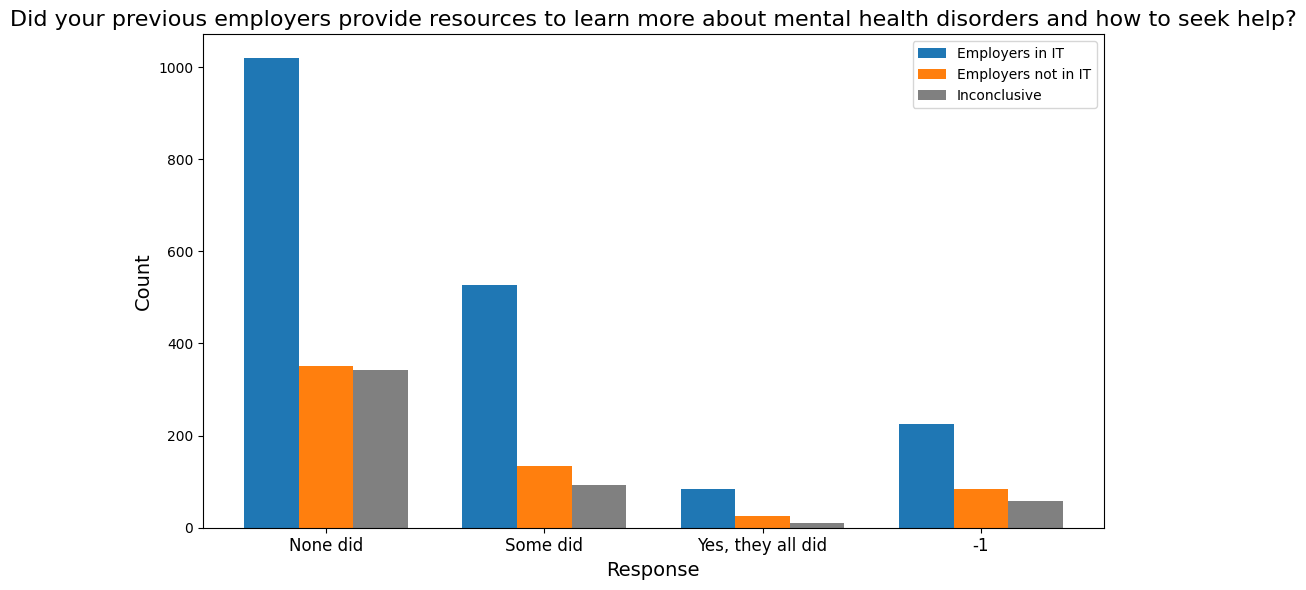

In [61]:
data_it = {
    'Response': [
        'None did', 
        'Some did', 
        'Yes, they all did', 
        '-1'
    ],
    'Count': [1020, 527, 85, 225]
}

data_not_in_it = {
    'Response': [
        'None did', 
        'Some did', 
        'Yes, they all did', 
        '-1'
    ],
    'Count': [351, 135, 26, 85]
}

data_inconclusive = {
    'Response': [
        'None did', 
        'Some did', 
        'Yes, they all did', 
        '-1'
    ],
    'Count': [343, 92, 11, 58]
}

# Create DataFrames
df_it = pd.DataFrame(data_it)
df_not_in_it = pd.DataFrame(data_not_in_it)
df_inconclusive = pd.DataFrame(data_inconclusive)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25
index = range(len(df_it))

# Plotting the bars for IT and not in IT
bars1 = ax.bar(index, df_it['Count'], bar_width, label='Employers in IT')
bars2 = ax.bar([i + bar_width for i in index], df_not_in_it['Count'], bar_width, label='Employers not in IT')
bars3 = ax.bar([i + bar_width*2 for i in index], df_inconclusive['Count'], bar_width, label='Inconclusive', color='gray')

# Adding labels and title
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title("Did your previous employers provide resources to learn more about mental health disorders and how to seek help?", fontsize=16)

# Adjust x-ticks for IT and not in IT responses
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(df_it['Response'], fontsize=12)

# Set legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
# Overall, how much importance does your employer place on mental health?
print_answer_counts(employer_it, 65)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 65)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 65)

Value counts for QuestionID 65:
AnswerText
5     231
7     138
8     114
3     102
6      99
4      79
2      62
0      54
10     37
9      31
1      27
Name: count, dtype: int64

Value counts for QuestionID 65:
AnswerText
5     81
7     41
3     34
6     34
0     33
2     33
4     25
1     21
8     19
9      9
10     4
Name: count, dtype: int64

Value counts for QuestionID 65:
AnswerText
-1    217
Name: count, dtype: int64


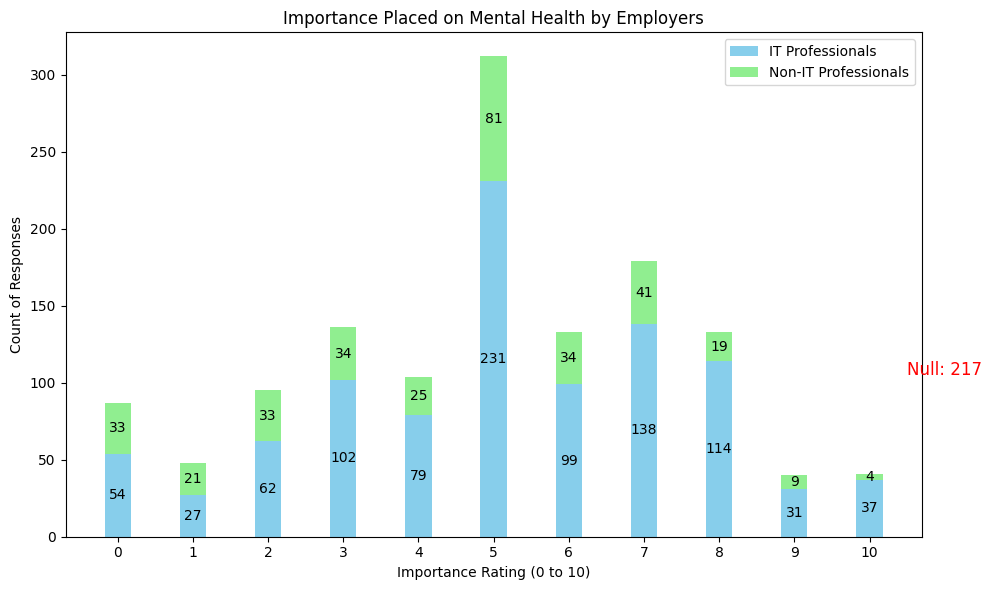

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ratings (scale from 0 to 10)
labels = [str(i) for i in range(11)]  # ['0', '1', ..., '10']

# Data for IT and Non-IT Professionals
it_counts = [54, 27, 62, 102, 79, 231, 99, 138, 114, 31, 37]  # Counts for IT professionals
nonit_counts = [33, 21, 33, 34, 25, 81, 34, 41, 19, 9, 4]  # Counts for Non-IT professionals
null_counts = [217]  # Null/Missing Responses (handled separately)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar width and x positions
width = 0.35
x = np.arange(len(labels))  # Positions for the ratings

# Plot stacked bars for IT and Non-IT
rects1 = ax.bar(x, it_counts, width, label='IT Professionals', color='skyblue')
rects2 = ax.bar(x, nonit_counts, width, bottom=it_counts, label='Non-IT Professionals', color='lightgreen')

# Add labels and title
ax.set_xlabel('Importance Rating (0 to 10)')
ax.set_ylabel('Count of Responses')
ax.set_title('Importance Placed on Mental Health by Employers')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add a legend
ax.legend()

# Function to add data labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:  # Add labels only for bars with height greater than 0
            ax.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                        xytext=(0, 0),
                        textcoords="offset points",
                        ha='center', va='center')

# Add the labels on the bars
add_labels(rects1)
add_labels(rects2)

# Handle Null/Missing responses separately
ax.text(len(labels), null_counts[0] // 2, f'Null: {null_counts[0]}', ha='center', va='center', fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()


In [64]:
# Do you think that discussing a physical health issue with your employer would have negative consequences?
print_answer_counts(employer_it, 90)
print()  # Print a newline for better readability
print_answer_counts(employer_nonit, 90)
print()  # Print a newline for better readability
print_answer_counts(employer_null_it, 90)

Value counts for QuestionID 90:
AnswerText
No       1427
Maybe     407
Yes        80
Name: count, dtype: int64

Value counts for QuestionID 90:
AnswerText
No       336
Maybe    134
Yes       22
Name: count, dtype: int64

Value counts for QuestionID 90:
AnswerText
-1    287
Name: count, dtype: int64


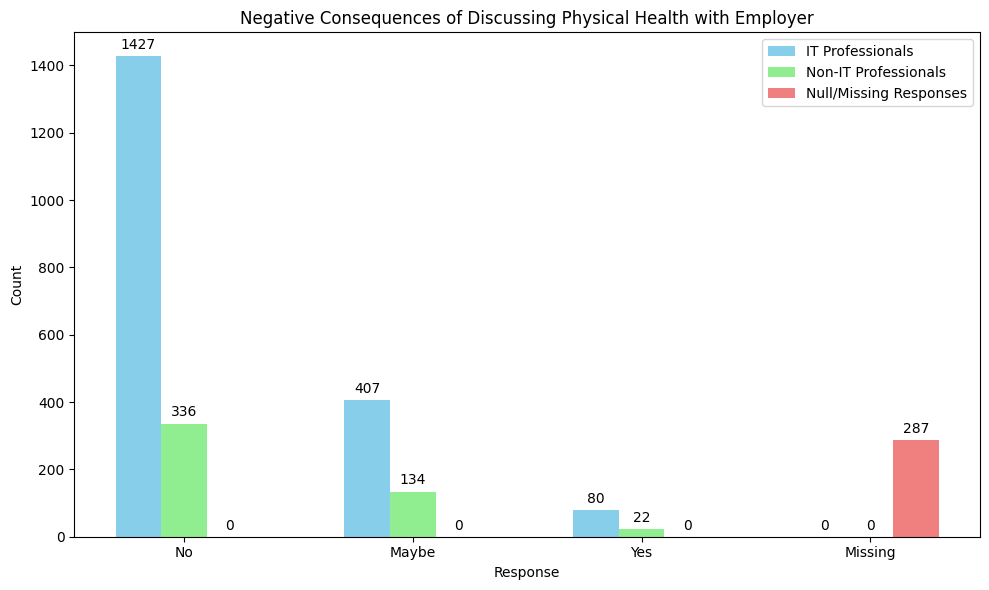

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the x-axis (response categories)
labels = ['No', 'Maybe', 'Yes', 'Missing']

# Data for IT, Non-IT, and Null/Missing Responses
it_counts = [1427, 407, 80, 0]  # No, Maybe, Yes, Missing
nonit_counts = [336, 134, 22, 0]  # No, Maybe, Yes, Missing
null_counts = [0, 0, 0, 287]  # Only Missing responses

# Set the positions for the bars
x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each group of bars
rects1 = ax.bar(x - width, it_counts, width, label='IT Professionals', color='skyblue')
rects2 = ax.bar(x, nonit_counts, width, label='Non-IT Professionals', color='lightgreen')
rects3 = ax.bar(x + width, null_counts, width, label='Null/Missing Responses', color='lightcoral')

# Add labels and title
ax.set_xlabel('Response')
ax.set_ylabel('Count')
ax.set_title('Negative Consequences of Discussing Physical Health with Employer')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add a legend
ax.legend()

# Function to add counts above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add the counts on top of each bar
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.tight_layout()
plt.show()



## Machine Learning

In [66]:
awareness = df_answer[df_answer['QuestionID'] == 99]
awareness.head(20)

,AnswerText,SurveyID,UserID,QuestionID
26460,Some of them,2014,1,99
26461,No,2014,2,99
26462,Yes,2014,3,99
26463,Some of them,2014,4,99
26464,Some of them,2014,5,99
26465,Yes,2014,6,99
26466,Some of them,2014,7,99
26467,No,2014,8,99
26468,Yes,2014,9,99
26469,Yes,2014,10,99


In [67]:
race = df_answer[df_answer['QuestionID'] == 89]
race.head()

,AnswerText,SurveyID,UserID,QuestionID
171141,-1,2017,2694,89
171142,-1,2017,2695,89
171143,White,2017,2696,89
171144,White,2017,2697,89
171145,More than one of the above,2017,2698,89


In [68]:
employees_no = df_answer[df_answer['QuestionID'] == 8]
employees_no.head()

,AnswerText,SurveyID,UserID,QuestionID
8820,6-25,2014,1,8
8821,More than 1000,2014,2,8
8822,6-25,2014,3,8
8823,26-100,2014,4,8
8824,100-500,2014,5,8


In [69]:
fam_history = df_answer[df_answer['QuestionID'] == 6]
fam_history.head()

,AnswerText,SurveyID,UserID,QuestionID
6300,No,2014,1,6
6301,No,2014,2,6
6302,No,2014,3,6
6303,Yes,2014,4,6
6304,No,2014,5,6


In [70]:
consequences = df_answer[df_answer['QuestionID'] == 90]
consequences.head()

,AnswerText,SurveyID,UserID,QuestionID
15120,No,2014,1,90
15121,No,2014,2,90
15122,No,2014,3,90
15123,Yes,2014,4,90
15124,No,2014,5,90


In [71]:
# Check for missing data
print(awareness.isnull().sum())
print(race.isnull().sum())
print(employees_no.isnull().sum())
print(fam_history.isnull().sum())
print(consequences.isnull().sum())

AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64


In [72]:
# Check for missing data
awareness.value_counts()
race.value_counts()
employees_no.value_counts()
fam_history.value_counts()
consequences.value_counts()

AnswerText  SurveyID  UserID  QuestionID
-1          2016      1264    90            1
No          2016      1335    90            1
                      1320    90            1
                      1321    90            1
                      1322    90            1
                                           ..
            2014      89      90            1
                      90      90            1
                      91      90            1
                      92      90            1
Yes         2016      2672    90            1
Name: count, Length: 2693, dtype: int64

In [73]:
# Select relevant columns and rename 'AnswerText' to feature names
awareness_df = awareness[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'awareness'})
race_df = race[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'race'})
employees_no_df = employees_no[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'employees_no'})
fam_history_df = fam_history[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'fam_history'})
consequences_df = consequences[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'consequences'})

# Merge DataFrames on 'UserID'
from functools import reduce
dfs = [awareness_df, race_df, employees_no_df, fam_history_df, consequences_df]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='UserID'), dfs)


In [74]:
# Convert 'UserID' to string in all DataFrames
awareness['UserID'] = awareness['UserID'].astype(str)
race['UserID'] = race['UserID'].astype(str)
employees_no['UserID'] = employees_no['UserID'].astype(str)
fam_history['UserID'] = fam_history['UserID'].astype(str)
consequences['UserID'] = consequences['UserID'].astype(str)

C:\Users\Work\AppData\Local\Temp\ipykernel_9964\3598978260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awareness['UserID'] = awareness['UserID'].astype(str)
C:\Users\Work\AppData\Local\Temp\ipykernel_9964\3598978260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['UserID'] = race['UserID'].astype(str)
C:\Users\Work\AppData\Local\Temp\ipykernel_9964\3598978260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [75]:
# Convert 'UserID' to string in all DataFrames using .loc
awareness.loc[:, 'UserID'] = awareness['UserID'].astype(str)
race.loc[:, 'UserID'] = race['UserID'].astype(str)
employees_no.loc[:, 'UserID'] = employees_no['UserID'].astype(str)
fam_history.loc[:, 'UserID'] = fam_history['UserID'].astype(str)
consequences.loc[:, 'UserID'] = consequences['UserID'].astype(str)

# Select relevant columns and rename 'AnswerText' to feature names with .copy()
awareness_df = awareness[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'awareness'}).copy()
race_df = race[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'race'}).copy()
employees_no_df = employees_no[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'employees_no'}).copy()
fam_history_df = fam_history[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'fam_history'}).copy()
consequences_df = consequences[['UserID', 'AnswerText']].rename(columns={'AnswerText': 'consequences'}).copy()

# Merge DataFrames on 'UserID' with outer join
from functools import reduce
dfs = [awareness_df, race_df, employees_no_df, fam_history_df, consequences_df]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='UserID', how='outer'), dfs)

# Check the result of the merge
print(merged_df.head())
print(merged_df.shape)
print(merged_df.isnull().sum())

merged_df.shape


  UserID     awareness race    employees_no fam_history consequences
0      1  Some of them  NaN            6-25          No           No
1      2            No  NaN  More than 1000          No           No
2      3           Yes  NaN            6-25          No           No
3      4  Some of them  NaN          26-100         Yes          Yes
4      5  Some of them  NaN         100-500          No           No
(4218, 6)
UserID             0
awareness       2958
race            2693
employees_no       0
fam_history        0
consequences    1525
dtype: int64


(4218, 6)

In [76]:
merged_df.isnull().sum()

UserID             0
awareness       2958
race            2693
employees_no       0
fam_history        0
consequences    1525
dtype: int64

In [77]:
df_null = merged_df[merged_df.isnull().any(axis=1)]

df_null.head()

,UserID,awareness,race,employees_no,fam_history,consequences
0,1,Some of them,NaN,6-25,No,No
1,2,No,NaN,More than 1000,No,No
2,3,Yes,NaN,6-25,No,No
3,4,Some of them,NaN,26-100,Yes,Yes
4,5,Some of them,NaN,100-500,No,No


In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        4218 non-null   object
 1   awareness     1260 non-null   object
 2   race          1525 non-null   object
 3   employees_no  4218 non-null   object
 4   fam_history   4218 non-null   object
 5   consequences  2693 non-null   object
dtypes: object(6)
memory usage: 197.8+ KB


In [79]:
merged_df['awareness'].fillna('Unknown', inplace=True)
merged_df['race'].fillna('Unknown', inplace=True)
merged_df['consequences'].fillna('Unknown', inplace=True)

In [80]:
merged_df = merged_df.drop('UserID', axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   awareness     4218 non-null   object
 1   race          4218 non-null   object
 2   employees_no  4218 non-null   object
 3   fam_history   4218 non-null   object
 4   consequences  4218 non-null   object
dtypes: object(5)
memory usage: 164.9+ KB


### Those who felt they would be okay letting their co-workers aware

In [81]:
merged_df['awareness'].unique()

array(['Some of them', 'No', 'Yes', 'Unknown'], dtype=object)

In [82]:
merged_df['awareness'].unique()

array(['Some of them', 'No', 'Yes', 'Unknown'], dtype=object)

In [83]:
merged_df['awareness'].fillna('Unknown', inplace=True)


In [84]:
print("Columns before get_dummies:", merged_df.columns.tolist())


Columns before get_dummies: ['awareness', 'race', 'employees_no', 'fam_history', 'consequences']


In [85]:
merged_df = pd.get_dummies(merged_df, columns=['awareness', 'race', 'employees_no', 'fam_history', 'consequences'], drop_first=True)
print("Columns after get_dummies:", merged_df.columns.tolist())


Columns after get_dummies: ['awareness_Some of them', 'awareness_Unknown', 'awareness_Yes', 'race_American Indian or Alaska Native', 'race_Asian', 'race_Black or African American', 'race_Caucasian', 'race_European American', 'race_Hispanic', 'race_I prefer not to answer', 'race_More than one of the above', 'race_Unknown', 'race_White', 'race_White Hispanic', 'employees_no_1-5', 'employees_no_100-500', 'employees_no_26-100', 'employees_no_500-1000', 'employees_no_6-25', 'employees_no_More than 1000', 'fam_history_No', 'fam_history_Yes', 'consequences_Maybe', 'consequences_No', 'consequences_Unknown', 'consequences_Yes']


In [86]:
# Features and target
X = merged_df.drop(columns=['awareness_Some of them', 'awareness_Unknown', 'awareness_Yes'])  # Drop all awareness dummies
y = merged_df['awareness_Yes']  # Choose the appropriate dummy variable as the target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', n_estimators=100, min_samples_leaf=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.08%


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       794
        True       0.00      0.00      0.00        50

    accuracy                           0.94       844
   macro avg       0.47      0.50      0.48       844
weighted avg       0.89      0.94      0.91       844



c:\Users\Work\anaconda3\envs\new-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Work\anaconda3\envs\new-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Work\anaconda3\envs\new-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)')

Cross-Validation Accuracy: 94.67% (+/- 0.00%)


In [90]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


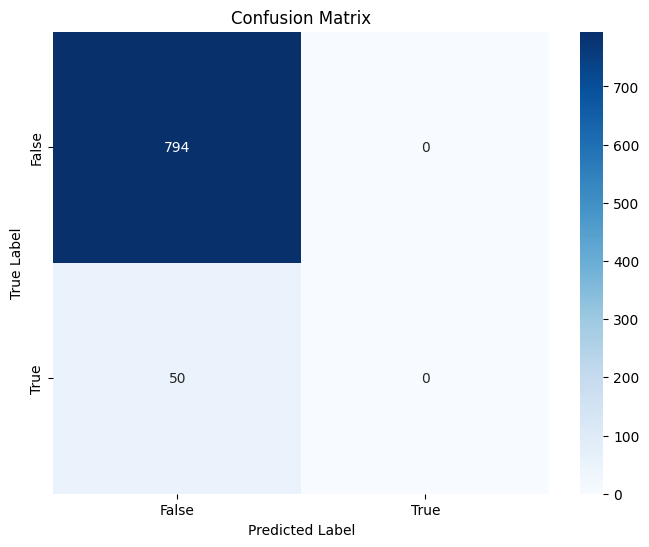

In [91]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [92]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.2f}")

consequences_No: 0.28
employees_no_1-5: 0.15
fam_history_No: 0.10
consequences_Unknown: 0.10
race_Unknown: 0.08
employees_no_6-25: 0.05
fam_history_Yes: 0.05
consequences_Maybe: 0.04
employees_no_26-100: 0.04
employees_no_100-500: 0.03
employees_no_More than 1000: 0.02
employees_no_500-1000: 0.02
race_White: 0.02
consequences_Yes: 0.01
race_Asian: 0.00
race_More than one of the above: 0.00
race_I prefer not to answer: 0.00
race_Black or African American: 0.00
race_White Hispanic: 0.00
race_Hispanic: 0.00
race_European American: 0.00
race_Caucasian: 0.00
race_American Indian or Alaska Native: 0.00


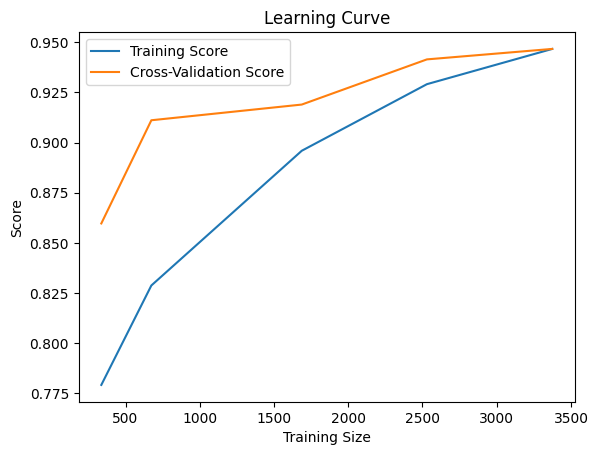

In [93]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, train_sizes=[0.1, 0.2, 0.5, 0.75, 1.0], random_state=42)

# Calculate the mean and standard deviation for training and testing scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score")
plt.ylabel("Score")
plt.xlabel("Training Size")
plt.title("Learning Curve")
plt.legend()
plt.show()

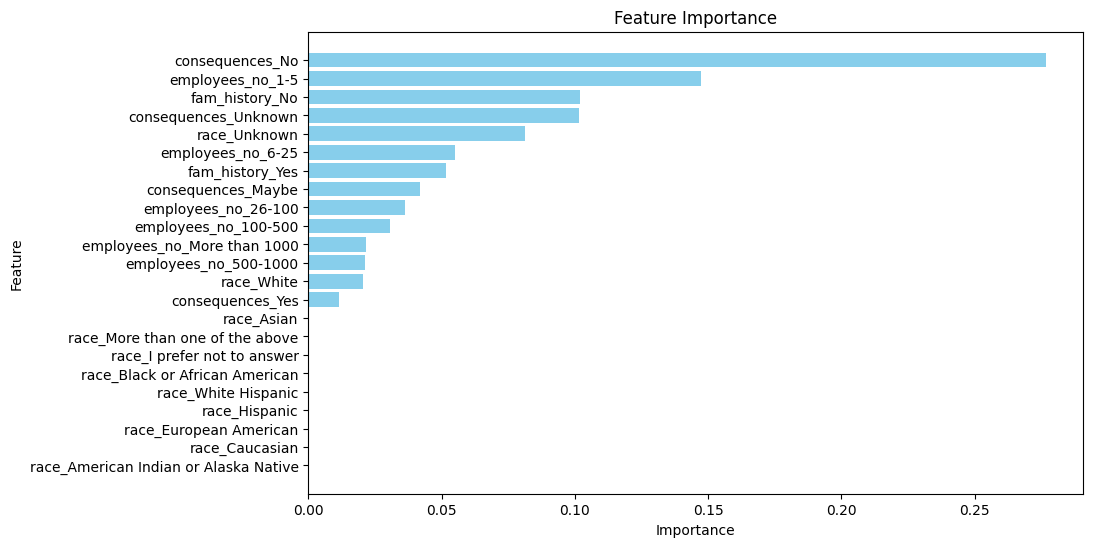

,Feature,Importance
20,consequences_No,0.276850
11,employees_no_1-5,0.147232
17,fam_history_No,0.101754
21,consequences_Unknown,0.101569
8,race_Unknown,0.081238
15,employees_no_6-25,0.054983
18,fam_history_Yes,0.051540
19,consequences_Maybe,0.041980
13,employees_no_26-100,0.036142
12,employees_no_100-500,0.030765


In [94]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Replace 'X' with your feature matrix
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Display the top features
feature_importance_df.head(10)

### Those who felt that there would be no consequences of their mental health being aware

In [112]:
# Features and target

X = merged_df.drop(columns=['consequences_Maybe', 'consequences_No', 'consequences_Unknown', 'consequences_Yes']) # Drop all awareness dummies
y = merged_df['consequences_No'] # Choose the appropriate dummy variable as the target

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', n_estimators=100, min_samples_leaf=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.89%


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.74      0.83       466
        True       0.75      0.97      0.84       378

    accuracy                           0.84       844
   macro avg       0.86      0.85      0.84       844
weighted avg       0.87      0.84      0.84       844



In [115]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)')

Cross-Validation Accuracy: 83.17% (+/- 14.87%)


In [116]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': None, 'n_estimators': 100}


In [117]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.2f}")

race_Unknown: 0.46
awareness_Unknown: 0.12
race_White: 0.11
awareness_Some of them: 0.07
employees_no_26-100: 0.04
employees_no_100-500: 0.04
awareness_Yes: 0.04
employees_no_6-25: 0.03
employees_no_More than 1000: 0.03
employees_no_1-5: 0.02
employees_no_500-1000: 0.02
fam_history_No: 0.01
fam_history_Yes: 0.01
race_More than one of the above: 0.00
race_I prefer not to answer: 0.00
race_Asian: 0.00
race_Black or African American: 0.00
race_Hispanic: 0.00
race_European American: 0.00
race_Caucasian: 0.00
race_American Indian or Alaska Native: 0.00
race_White Hispanic: 0.00


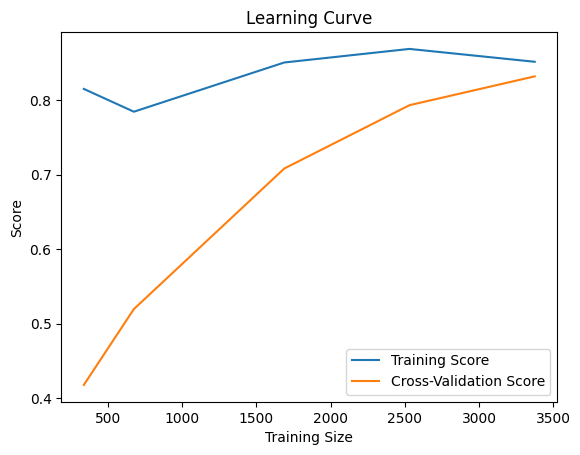

In [118]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, train_sizes=[0.1, 0.2, 0.5, 0.75, 1.0], random_state=42)

# Calculate the mean and standard deviation for training and testing scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score")
plt.ylabel("Score")
plt.xlabel("Training Size")
plt.title("Learning Curve")
plt.legend()
plt.show()

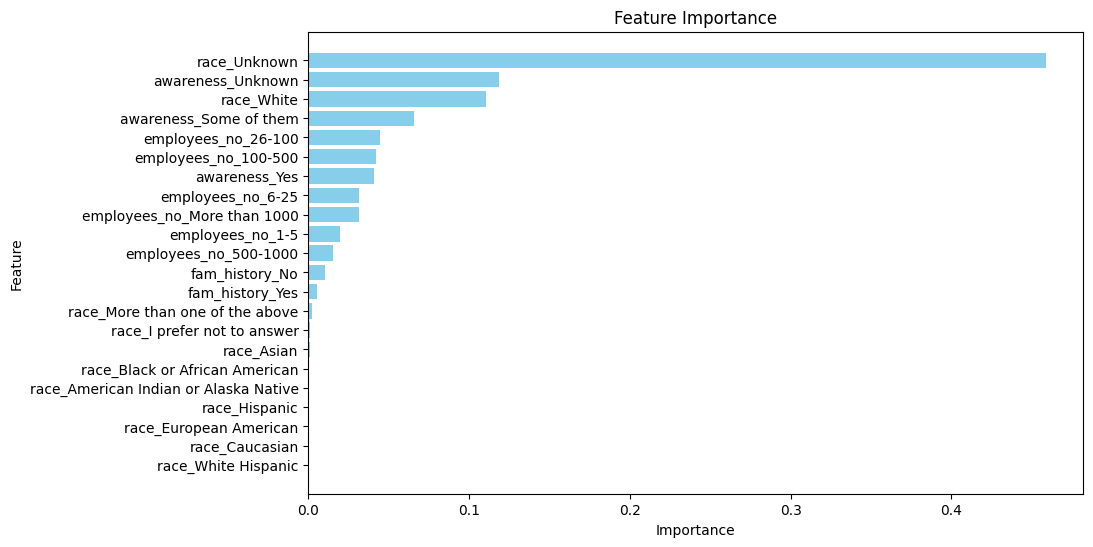

,Feature,Importance
11,race_Unknown,0.459087
1,awareness_Unknown,0.118352
12,race_White,0.110344
0,awareness_Some of them,0.065801
16,employees_no_26-100,0.044571
15,employees_no_100-500,0.042175
2,awareness_Yes,0.041073
18,employees_no_6-25,0.031767
19,employees_no_More than 1000,0.031710
14,employees_no_1-5,0.019802


In [119]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Replace 'X' with your feature matrix
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Display the top features
feature_importance_df.head(10)